CS109 Final Project

Rosan Bishwakarma, Rudra Barua, Albert Zhang, Jeremy Zhang

Group 69

In [ ]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

In [ ]:
import random
random_seed = 0
random.seed(random_seed)

import os
import sys

import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_curve, roc_auc_score
)                           
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

%matplotlib inline

# RUN THIS CELL
import itertools
import math

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

%matplotlib inline
pd.set_option('display.width', 1000)

In [ ]:
mortality = pd.read_csv("Project_B_NHANESI_full.csv")
np.random.seed(random_seed)


print(mortality.shape)


(14407, 42)


In [ ]:
display(mortality.head())

,sequence_ID,sex_isFemale,race,poverty_index,age,serum_albumin,alkaline_phosphatase,SGOT,BUN,calcium,creatinine,potassium,sodium,total_bilirubin,serum_protein,red_blood_cells,white_blood_cells,hemoglobin,hematocrit,platelets_estimate,segmented_neutrophils,lymphocytes,monocytes,eosinophils,basophils,band_neutrophils,cholesterol,serum_iron,serum_magnesium,total_iron_binding_capacity,tranferrin_saturation,urine_albumin,urine_glucose,urine_pH,urine_hematest,sedimentation_rate,uric_acid,systolic_blood_pressure,pulse_pressure,weight,height,y
0,20751,False,1,NaN,51,NaN,85.0,NaN,16.0,10.1,1.0,4.1,140.0,0.5,NaN,5.48,10.1,16.0,49.0,Normal,70.0,26.0,1.0,3.0,0.0,0.0,256.0,NaN,182.0,NaN,NaN,Negative,Negative,5.0,Negative,NaN,6.2,110.0,40.0,84.25,182.1,-16.952
1,20753,False,1,NaN,41,NaN,68.0,2.27,16.0,10.2,0.9,4.4,142.0,0.9,NaN,4.62,6.3,14.1,42.0,Normal,54.0,35.0,2.0,8.0,1.0,0.0,254.0,NaN,159.0,NaN,NaN,Negative,Negative,5.0,Negative,NaN,7.7,136.0,54.0,87.09,188.2,-17.200
2,20754,True,3,NaN,31,NaN,61.0,1.86,10.0,9.6,0.6,3.9,139.0,0.3,NaN,4.26,7.8,12.0,38.0,Normal,56.0,37.0,2.0,5.0,0.0,0.0,177.0,NaN,160.0,NaN,NaN,Negative,Negative,6.0,Negative,NaN,4.9,110.0,24.0,60.21,159.2,-17.630
3,20755,False,1,NaN,48,NaN,58.0,NaN,12.0,9.7,1.1,4.2,142.0,0.8,NaN,4.71,5.1,12.7,40.0,Normal,54.0,33.0,4.0,8.0,1.0,0.0,209.0,NaN,153.0,NaN,NaN,Negative,Negative,5.0,Negative,NaN,8.4,126.0,36.0,88.22,175.6,-17.271
4,20756,True,1,NaN,29,NaN,37.0,1.69,19.0,9.3,1.1,4.2,140.0,0.7,NaN,4.23,5.2,12.3,40.0,Normal,65.0,34.0,1.0,0.0,0.0,0.0,206.0,NaN,156.0,NaN,NaN,Negative,Negative,5.0,Negative,NaN,4.3,98.0,36.0,51.37,163.5,-17.132


In [ ]:
display(mortality.describe())

,sequence_ID,race,poverty_index,age,serum_albumin,alkaline_phosphatase,SGOT,BUN,calcium,creatinine,potassium,sodium,total_bilirubin,serum_protein,red_blood_cells,white_blood_cells,hemoglobin,hematocrit,segmented_neutrophils,lymphocytes,monocytes,eosinophils,basophils,band_neutrophils,cholesterol,serum_iron,serum_magnesium,total_iron_binding_capacity,tranferrin_saturation,urine_pH,sedimentation_rate,uric_acid,systolic_blood_pressure,pulse_pressure,weight,height,y
count,14407.000,14407.000,11348.000,14407.000,10801.000,6364.000,6315.000,2935.000,6256.000,2591.000,2992.000,3003.000,5854.000,10800.000,10513.000,12959.000,13373.000,13631.000,5854.000,5854.000,5854.000,5854.000,5854.000,5854.000,13970.000,9943.000,13814.000,10149.000,9932.000,13695.000,10308.000,6651.000,14339.000,14335.000,14338.000,14361.000,14407.000
mean,13109.294,1.174,285.289,48.945,4.360,60.204,2.429,14.807,9.671,1.008,4.069,142.368,0.514,7.106,4.719,7.475,14.370,42.741,58.232,36.207,3.156,2.015,0.131,0.251,220.819,101.122,168.370,362.766,28.556,5.631,16.182,5.527,134.170,50.667,70.994,166.255,-9.110
std,7376.748,0.408,223.321,15.590,0.329,25.888,1.490,4.463,0.479,0.284,0.344,3.114,0.257,0.511,0.485,2.207,1.505,3.997,9.974,9.876,2.681,2.084,0.393,1.090,48.441,37.247,14.331,59.969,11.233,0.774,11.482,1.470,24.412,18.028,15.751,9.175,14.398
min,1.000,1.000,2.000,25.000,2.700,4.800,0.270,0.800,0.200,0.400,2.700,121.000,0.100,4.400,2.140,2.100,5.000,19.000,2.000,3.000,0.000,0.000,0.000,0.000,53.000,17.000,82.000,112.000,3.200,5.000,1.000,0.700,80.000,10.000,27.900,132.800,-22.060
25%,6711.500,1.000,129.000,35.000,4.200,45.000,1.800,12.000,9.400,0.900,3.800,141.000,0.380,6.800,4.390,6.000,13.300,40.000,52.000,30.000,1.000,0.000,0.000,0.000,187.000,75.000,159.000,322.000,21.000,5.000,7.000,4.500,118.000,38.000,59.530,159.500,-19.885
50%,13313.000,1.000,229.000,48.000,4.400,57.000,2.200,14.000,9.700,1.000,4.100,143.000,0.500,7.100,4.700,7.200,14.300,43.000,58.000,36.000,3.000,1.000,0.000,0.000,217.000,96.000,168.000,356.000,27.200,5.000,14.000,5.400,130.000,48.000,69.170,165.500,-18.028
75%,19835.500,1.000,358.000,65.000,4.600,70.000,2.600,17.000,10.000,1.100,4.300,144.000,0.600,7.400,5.030,8.600,15.400,45.000,65.000,42.000,5.000,3.000,0.000,0.000,249.000,122.000,177.000,396.000,34.600,6.000,22.000,6.500,148.000,60.000,80.290,172.700,6.179
max,25061.000,3.000,999.000,75.000,5.700,580.000,31.000,49.000,12.500,9.000,5.400,157.000,5.200,13.300,6.990,56.000,22.400,68.000,94.000,95.000,20.000,17.000,3.000,22.000,793.000,396.000,289.000,717.000,100.000,9.000,72.000,12.500,270.000,170.000,181.440,205.000,21.474


In [ ]:
display(mortality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14407 entries, 0 to 14406
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sequence_ID                  14407 non-null  int64  
 1   sex_isFemale                 14407 non-null  bool   
 2   race                         14407 non-null  int64  
 3   poverty_index                11348 non-null  float64
 4   age                          14407 non-null  int64  
 5   serum_albumin                10801 non-null  float64
 6   alkaline_phosphatase         6364 non-null   float64
 7   SGOT                         6315 non-null   float64
 8   BUN                          2935 non-null   float64
 9   calcium                      6256 non-null   float64
 10  creatinine                   2591 non-null   float64
 11  potassium                    2992 non-null   float64
 12  sodium                       3003 non-null   float64
 13  total_bilirubin 

None

In [ ]:
# You'll need to install missingno the first time you run this notebook
!pip install missingno

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
mortality.dtypes

sequence_ID                      int64
sex_isFemale                      bool
race                             int64
poverty_index                  float64
age                              int64
serum_albumin                  float64
alkaline_phosphatase           float64
SGOT                           float64
BUN                            float64
calcium                        float64
creatinine                     float64
potassium                      float64
sodium                         float64
total_bilirubin                float64
serum_protein                  float64
red_blood_cells                float64
white_blood_cells              float64
hemoglobin                     float64
hematocrit                     float64
platelets_estimate              object
segmented_neutrophils          float64
lymphocytes                    float64
monocytes                      float64
eosinophils                    float64
basophils                      float64
band_neutrophils         

In [ ]:
missing_columns = mortality.columns[mortality.isnull().any()]
print(missing_columns)

Index(['poverty_index', 'serum_albumin', 'alkaline_phosphatase', 'SGOT', 'BUN', 'calcium', 'creatinine', 'potassium', 'sodium', 'total_bilirubin', 'serum_protein', 'red_blood_cells', 'white_blood_cells', 'hemoglobin', 'hematocrit', 'platelets_estimate', 'segmented_neutrophils', 'lymphocytes', 'monocytes', 'eosinophils', 'basophils', 'band_neutrophils', 'cholesterol', 'serum_iron', 'serum_magnesium', 'total_iron_binding_capacity', 'tranferrin_saturation', 'urine_albumin', 'urine_glucose', 'urine_pH', 'urine_hematest', 'sedimentation_rate', 'uric_acid', 'systolic_blood_pressure', 'pulse_pressure', 'weight', 'height'], dtype='object')


In [ ]:
# identify columns with missing data
from sklearn.impute import KNNImputer
numerical = ['poverty_index', 'age', 'serum_albumin', 'alkaline_phosphatase', 'SGOT', 'BUN', 'calcium', 'creatinine', 'potassium', 'sodium', 'total_bilirubin', 'serum_protein', 'red_blood_cells', 'white_blood_cells', 'hemoglobin', 'hematocrit', 'segmented_neutrophils', 'lymphocytes', 'monocytes', 'eosinophils', 'basophils', 'band_neutrophils', 'cholesterol', 'serum_iron', 'serum_magnesium', 'total_iron_binding_capacity', 'tranferrin_saturation', 'urine_pH', 'sedimentation_rate', 'uric_acid', 'systolic_blood_pressure', 'pulse_pressure', 'weight', 'height']
y_abs = abs(mortality['y'])
mortality['abs_y'] = y_abs

categorical = mortality.drop(columns=numerical+['sequence_ID','y', 'abs_y']).columns

encoded_df = mortality.copy(deep=True)


encoded_sex = pd.get_dummies(encoded_df["sex_isFemale"], drop_first=True).rename({1: 'is_female'}, axis=1)
encoded_race = pd.get_dummies(encoded_df["race"]).rename({1: 'is_white', 2: 'is_black', 3:'is_other'}, axis=1)
encoded_platelets = pd.get_dummies(encoded_df["platelets_estimate"]).rename({'Decreased': 'decreased_platelets', 'Increased': 'increased_platelets', 'Normal':'normal_platelets'}, axis=1)
encoded_ualbumin = pd.get_dummies(encoded_df["urine_albumin"]).rename({'>=100': 'ualbumin_100', '>=1000': 'ualbumin_1000', '>=30':'ualbumin_30', '>=300':'ualbumin_300', 'Negative':'ualbumin_negative', 'Trace':'ualbumin_trace'}, axis=1)

labels = {}
for shade in pd.get_dummies(encoded_df["urine_glucose"]).columns:
    labels[shade] = 'uglucose_' + shade.lower()
encoded_uglucose = pd.get_dummies(encoded_df["urine_glucose"]).rename(labels, axis=1)

labels = {}
for size in pd.get_dummies(encoded_df["urine_hematest"]).columns:
    labels[size] = 'uhematest_' + size.lower()
encoded_uhematest = pd.get_dummies(encoded_df["urine_hematest"]).rename(labels, axis=1)

encoded_df = pd.concat([encoded_df, encoded_sex, encoded_race, encoded_platelets, encoded_ualbumin, encoded_uhematest], axis=1)
encoded_df.drop(columns=categorical,inplace=True)
encoded_df.drop(columns=["sequence_ID", "y", "abs_y"],inplace=True)

for col in numerical:
  encoded_df[col].fillna(encoded_df[col].mean(), inplace=True)
  
for col in encoded_df.drop(columns=numerical).columns:
  print(col, encoded_df[col].mode())

for col in encoded_df.drop(columns=numerical).columns:
  encoded_df[col].fillna(encoded_df[col].mode(), inplace=True)

missing_columns = encoded_df.columns[encoded_df.isnull().any()]
print(missing_columns)

encoded_df[encoded_df.isnull().any()]
# string = mortality.columns[mortality.str.contains]

mortality_imputed = encoded_df

mortality_imputed = KNNImputer(n_neighbors=3).fit_transform(mortality_imputed)

# mortality_imputed.columns[mortality_imputed.isnull().any()]

Index(['poverty_index', 'serum_albumin', 'alkaline_phosphatase', 'SGOT', 'BUN', 'calcium', 'creatinine', 'potassium', 'sodium', 'total_bilirubin', 'serum_protein', 'red_blood_cells', 'white_blood_cells', 'hemoglobin', 'hematocrit', 'platelets_estimate', 'segmented_neutrophils', 'lymphocytes', 'monocytes', 'eosinophils', 'basophils', 'band_neutrophils', 'cholesterol', 'serum_iron', 'serum_magnesium', 'total_iron_binding_capacity', 'tranferrin_saturation', 'urine_albumin', 'urine_glucose', 'urine_pH', 'urine_hematest', 'sedimentation_rate', 'uric_acid', 'systolic_blood_pressure', 'pulse_pressure', 'weight', 'height'], dtype='object')


KeyboardInterrupt: 

In [ ]:
encoded_df.columns[encoded_df.isnull().any()]

Index([], dtype='object')

''

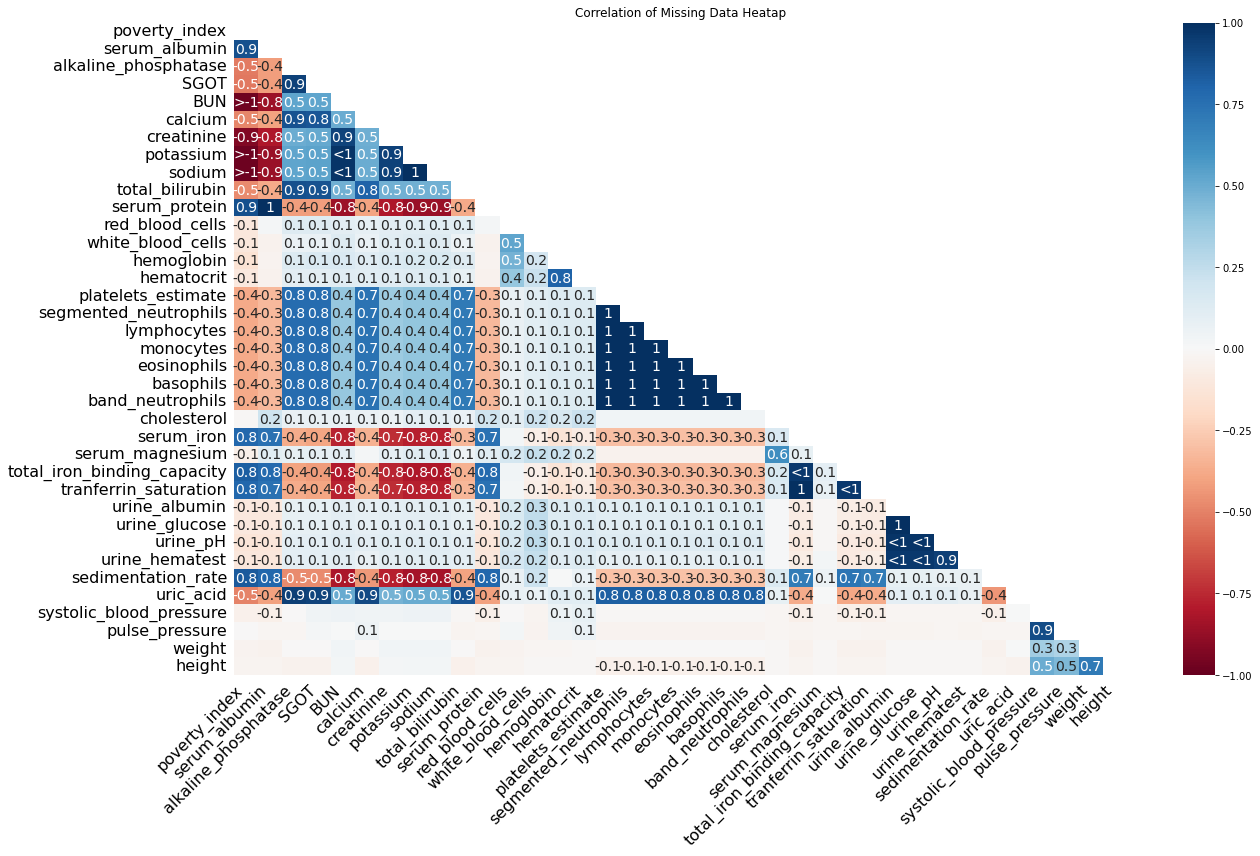

In [ ]:
import missingno as msno
msno.heatmap(mortality.sample(500)).set(title='Correlation of Missing Data Heatap')
;

In [ ]:
mortality_datatypes = pd.DataFrame(mortality.dtypes)
mortality_null_count = mortality.count()
print(mortality_datatypes.to_latex())
print(mortality_null_count.to_latex())

\begin{tabular}{ll}
\toprule
{} &        0 \\
\midrule
sequence\_ID                 &    int64 \\
sex\_isFemale                &     bool \\
race                        &    int64 \\
poverty\_index               &  float64 \\
age                         &    int64 \\
serum\_albumin               &  float64 \\
alkaline\_phosphatase        &  float64 \\
SGOT                        &  float64 \\
BUN                         &  float64 \\
calcium                     &  float64 \\
creatinine                  &  float64 \\
potassium                   &  float64 \\
sodium                      &  float64 \\
total\_bilirubin             &  float64 \\
serum\_protein               &  float64 \\
red\_blood\_cells             &  float64 \\
white\_blood\_cells           &  float64 \\
hemoglobin                  &  float64 \\
hematocrit                  &  float64 \\
platelets\_estimate          &   object \\
segmented\_neutrophils       &  float64 \\
lymphocytes                 &  float64 \\
monocyte

In [ ]:
column_info = pd.concat([pd.DataFrame(mortality.dtypes), mortality.count()], axis=1)
display(column_info)
print(column_info.to_latex())

,0,0
sequence_ID,int64,14407
sex_isFemale,bool,14407
race,int64,14407
poverty_index,float64,11348
age,int64,14407
serum_albumin,float64,10801
alkaline_phosphatase,float64,6364
SGOT,float64,6315
BUN,float64,2935
calcium,float64,6256


\begin{tabular}{llr}
\toprule
{} &        0 &      0 \\
\midrule
sequence\_ID                 &    int64 &  14407 \\
sex\_isFemale                &     bool &  14407 \\
race                        &    int64 &  14407 \\
poverty\_index               &  float64 &  11348 \\
age                         &    int64 &  14407 \\
serum\_albumin               &  float64 &  10801 \\
alkaline\_phosphatase        &  float64 &   6364 \\
SGOT                        &  float64 &   6315 \\
BUN                         &  float64 &   2935 \\
calcium                     &  float64 &   6256 \\
creatinine                  &  float64 &   2591 \\
potassium                   &  float64 &   2992 \\
sodium                      &  float64 &   3003 \\
total\_bilirubin             &  float64 &   5854 \\
serum\_protein               &  float64 &  10800 \\
red\_blood\_cells             &  float64 &  10513 \\
white\_blood\_cells           &  float64 &  12959 \\
hemoglobin                  &  float64 &  13373 \\
hemato

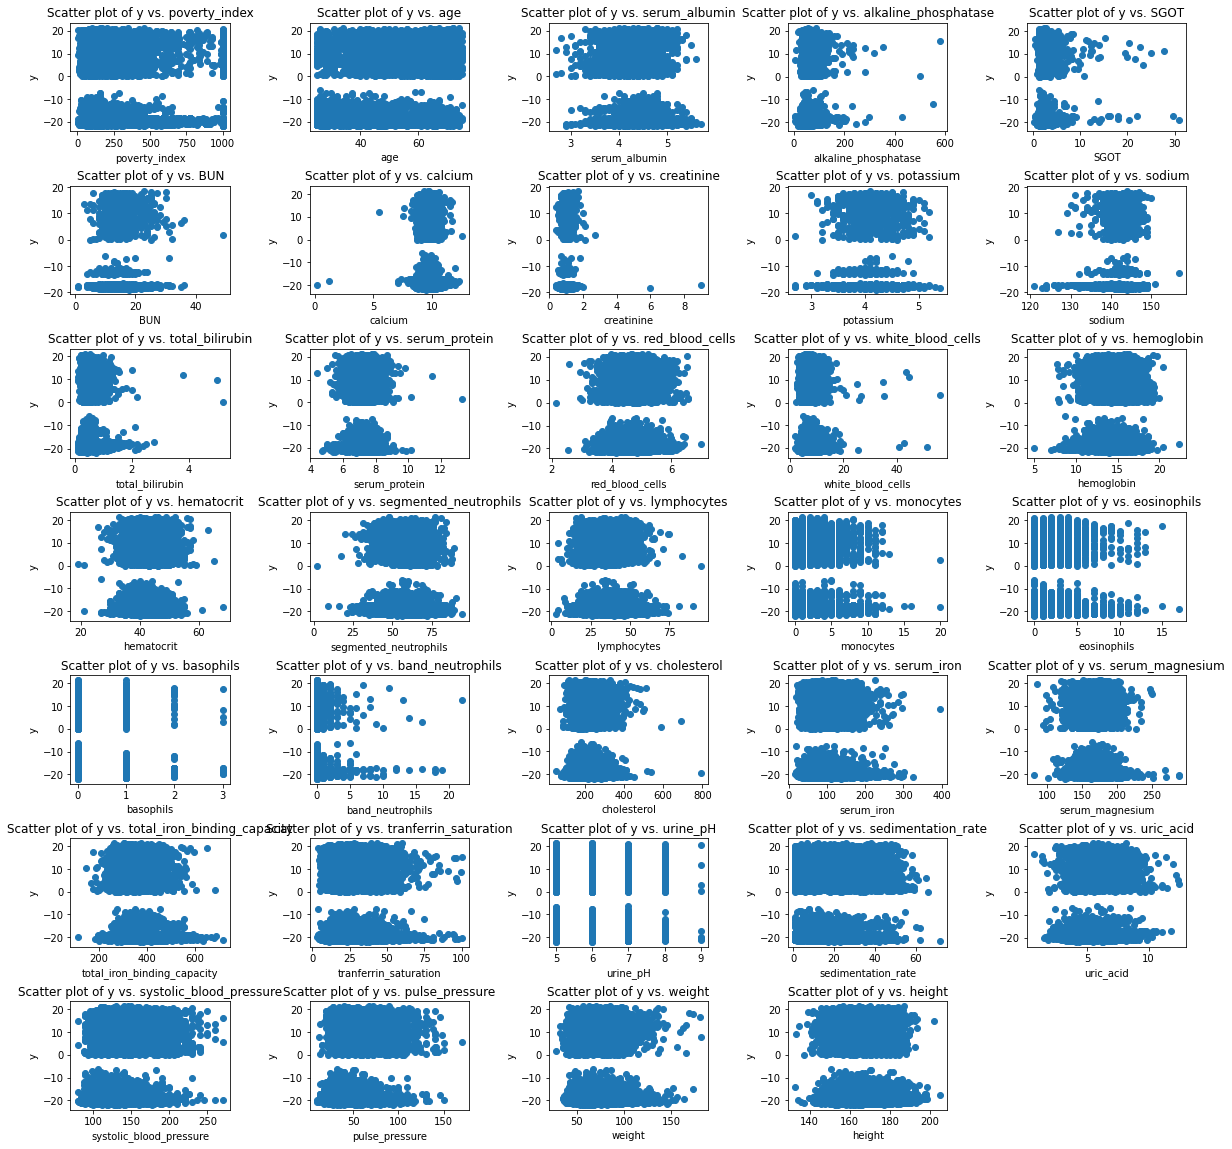

In [ ]:
# Numerical predictors
numerical = ['poverty_index', 'age', 'serum_albumin', 'alkaline_phosphatase', 'SGOT', 'BUN', 'calcium', 'creatinine', 'potassium', 'sodium', 'total_bilirubin', 'serum_protein', 'red_blood_cells', 'white_blood_cells', 'hemoglobin', 'hematocrit', 'segmented_neutrophils', 'lymphocytes', 'monocytes', 'eosinophils', 'basophils', 'band_neutrophils', 'cholesterol', 'serum_iron', 'serum_magnesium', 'total_iron_binding_capacity', 'tranferrin_saturation', 'urine_pH', 'sedimentation_rate', 'uric_acid', 'systolic_blood_pressure', 'pulse_pressure', 'weight', 'height']
# y
y = mortality['y']
# Create plots
fig, axes = plt.subplots(7,5, figsize=(20, 20))
axes = axes.flatten().tolist()
# Put space between plots
fig.subplots_adjust(hspace = 0.5, wspace=0.5)
# Go through each numertical predictor
for i, pred in enumerate(numerical):
    # Create a scatter plot of that predictor against y
    axes[i].scatter(x = mortality[pred], y = y)
    # Label
    axes[i].set_xlabel(pred)
    axes[i].set_ylabel('y')
    axes[i].set_title(f'Scatter plot of y vs. {pred}')
# Delete the extra blank plot
fig.delaxes(axes[i+1])

plt.show()


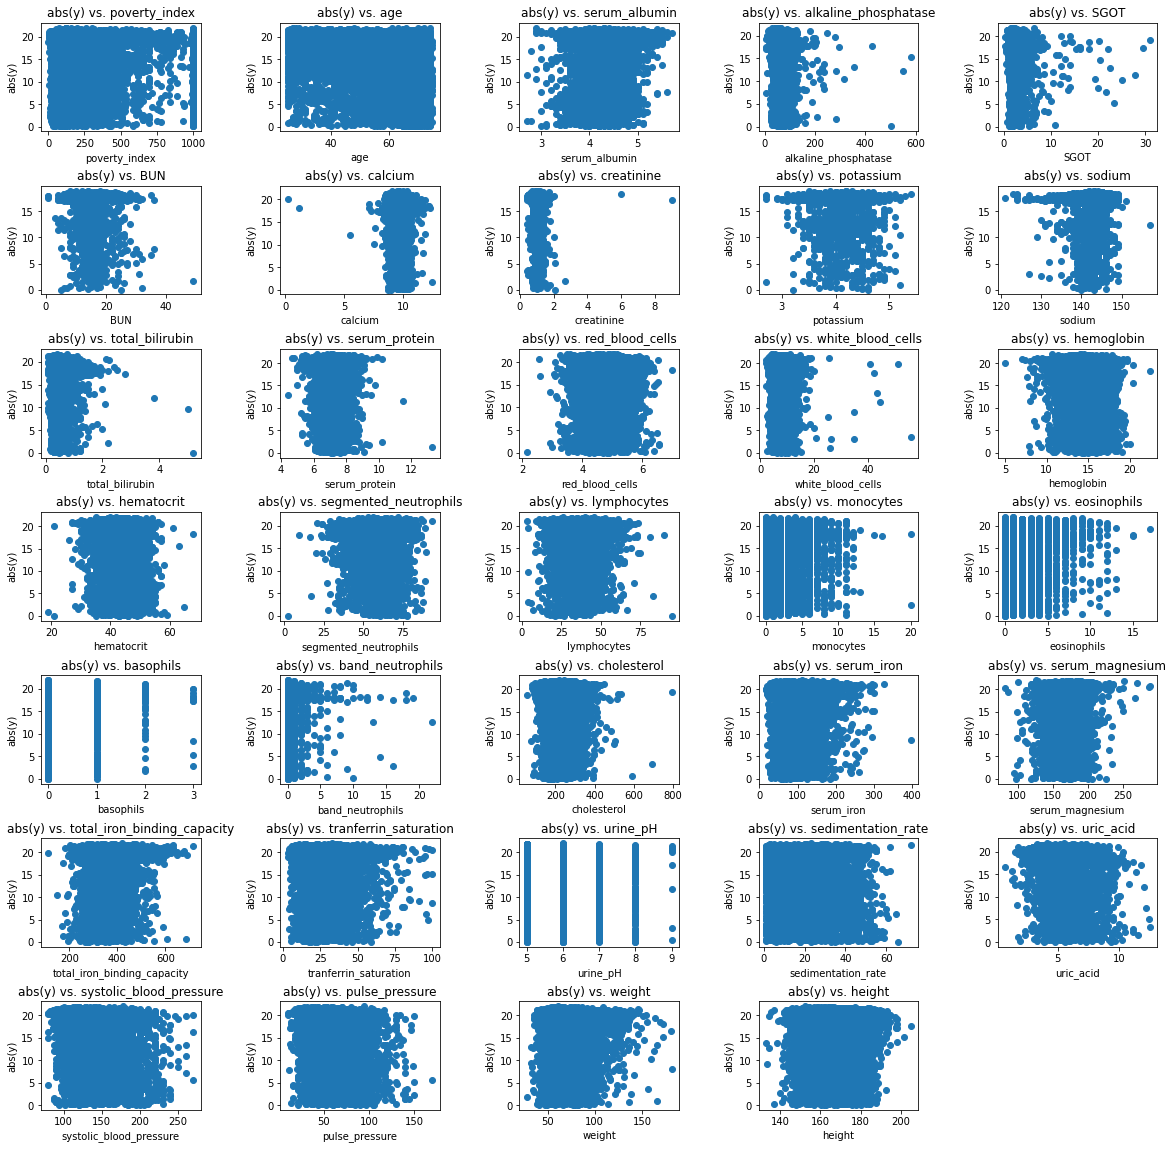

In [ ]:
# Numerical predictors
numerical = ['poverty_index', 'age', 'serum_albumin', 'alkaline_phosphatase', 'SGOT', 'BUN', 'calcium', 'creatinine', 'potassium', 'sodium', 'total_bilirubin', 'serum_protein', 'red_blood_cells', 'white_blood_cells', 'hemoglobin', 'hematocrit', 'segmented_neutrophils', 'lymphocytes', 'monocytes', 'eosinophils', 'basophils', 'band_neutrophils', 'cholesterol', 'serum_iron', 'serum_magnesium', 'total_iron_binding_capacity', 'tranferrin_saturation', 'urine_pH', 'sedimentation_rate', 'uric_acid', 'systolic_blood_pressure', 'pulse_pressure', 'weight', 'height']
# Absolute value of y
y_abs = abs(mortality['y'])
mortality['abs_y'] = y_abs
# Create plots
fig, axes = plt.subplots(7,5, figsize=(20, 20))
axes = axes.flatten().tolist()
# Put space between plots
fig.subplots_adjust(hspace = 0.5, wspace=0.5)
# Go through each numertical predictor
for i, pred in enumerate(numerical):
    # Create a scatter plot of that predictor against y
    axes[i].scatter(x = mortality[pred], y = y_abs)
    # Label
    axes[i].set_xlabel(pred)
    axes[i].set_ylabel('abs(y)')
    axes[i].set_title(f'abs(y) vs. {pred}')
# Delete the extra blank plot
fig.delaxes(axes[i+1])

plt.show()


In [ ]:
# Get the categorical columns
categorical = mortality.drop(columns=numerical+['sequence_ID','y']).columns
print(categorical)

Index(['sex_isFemale', 'race', 'platelets_estimate', 'urine_albumin', 'urine_glucose', 'urine_hematest', 'abs_y'], dtype='object')


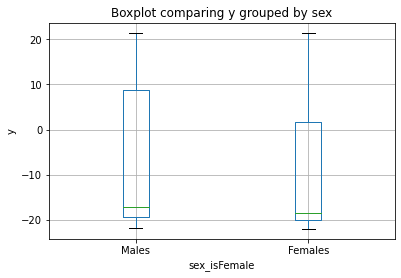

In [ ]:
# Create a boxplot comparing years survived since the initial examination till death
# Grouped by males and females
axes = mortality.boxplot(column='y', by='sex_isFemale', return_type='axes')
axes[0].set_ylabel('y')
axes[0].set_xticklabels(['Males', 'Females'])
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing y grouped by sex')
plt.show()

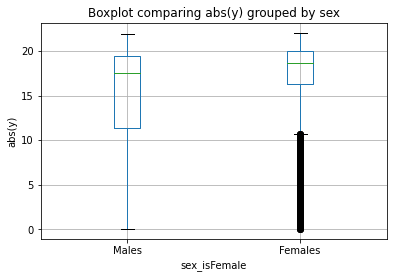

In [ ]:
# Create a boxplot comparing absolute years survived since the initial examination till death
# Grouped by males and females
axes = mortality.boxplot(column='abs_y', by='sex_isFemale', return_type='axes')
axes[0].set_ylabel('abs(y)')
axes[0].set_xticklabels(['Males', 'Females'])
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing abs(y) grouped by sex')
plt.show()

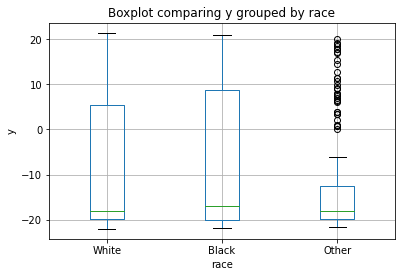

In [ ]:
# Create a boxplot comparing years that survived since the initial examination till death
# Grouped by white, black, other, and unknown
axes = mortality.boxplot(column='y', by='race', return_type='axes')
axes[0].set_ylabel('y')
axes[0].get_figure().suptitle('')
axes[0].set_xticklabels(['White', 'Black', 'Other'])
axes[0].set_title('Boxplot comparing y grouped by race')
plt.show()

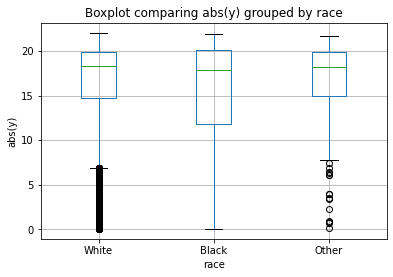

In [ ]:
# Create a boxplot comparing absolute years that survived since the initial examination till death
# Grouped by white, black, other, and unknown
axes = mortality.boxplot(column='abs_y', by='race', return_type='axes')
axes[0].set_ylabel('abs(y)')
axes[0].get_figure().suptitle('')
axes[0].set_xticklabels(['White', 'Black', 'Other'])
axes[0].set_title('Boxplot comparing abs(y) grouped by race')
plt.show()

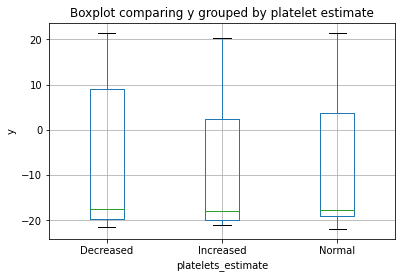

In [ ]:
# Create a boxplot comparing years that survived since the initial examination till death
# Grouped by decreased platelet estimate, increased platelet estimate, and normal platelet estimte
axes = mortality.boxplot(column='y', by='platelets_estimate', return_type='axes')
axes[0].get_figure().suptitle('')
axes[0].set_ylabel('y')
axes[0].set_title('Boxplot comparing y grouped by platelet estimate')
plt.show()

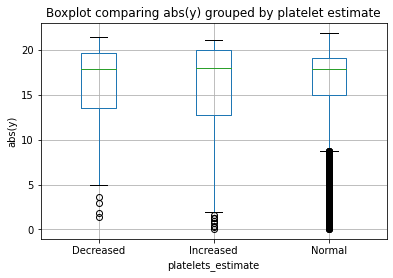

In [ ]:
# Create a boxplot comparing absolute years that survived since the initial examination till death
# Grouped by decreased platelet estimate, increased platelet estimate, and normal platelet estimte
axes = mortality.boxplot(column='abs_y', by='platelets_estimate', return_type='axes')
axes[0].get_figure().suptitle('')
axes[0].set_ylabel('abs(y)')
axes[0].set_title('Boxplot comparing abs(y) grouped by platelet estimate')
plt.show()

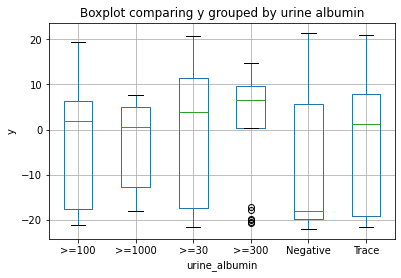

In [ ]:
# Create a boxplot comparing years that survived since the initial examination till death
# Grouped by various urine albumin levels
axes = mortality.boxplot(column='y', by='urine_albumin', return_type='axes')
axes[0].set_ylabel('y')
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing y grouped by urine albumin')
plt.show()

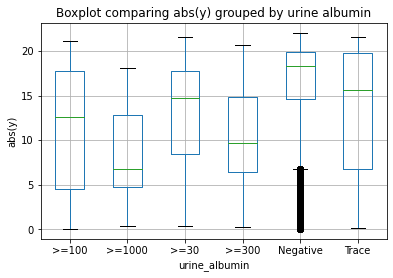

In [ ]:
# Create a boxplot comparing absolute years that survived since the initial examination till death
# Grouped by various urine albumin levels
axes = mortality.boxplot(column='abs_y', by='urine_albumin', return_type='axes')
axes[0].set_ylabel('abs(y)')
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing abs(y) grouped by urine albumin')
plt.show()

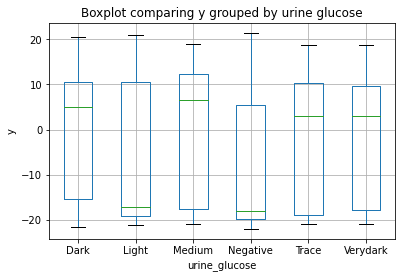

In [ ]:
# Create a boxplot comparing years that survived since the initial examination till death
# Grouped by various urine glucose levels
axes = mortality.boxplot(column='y', by='urine_glucose', return_type='axes')
axes[0].set_ylabel('y')
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing y grouped by urine glucose')
plt.show()

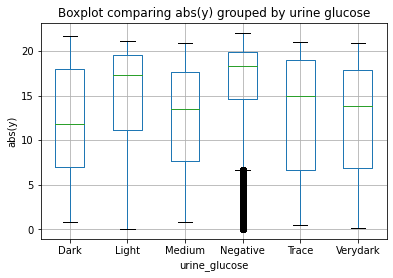

In [ ]:
# Create a boxplot comparing absolute years that survived since the initial examination till death
# Grouped by various urine glucose levels
axes = mortality.boxplot(column='abs_y', by='urine_glucose', return_type='axes')
axes[0].set_ylabel('abs(y)')
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing abs(y) grouped by urine glucose')
plt.show()

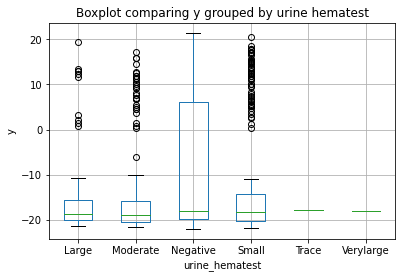

In [ ]:
# Create a boxplot comparing years that survived since the initial examination till death
# Grouped by various urine hematest levels
axes = mortality.boxplot(column='y', by='urine_hematest', return_type='axes')
axes[0].set_ylabel('y')
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing y grouped by urine hematest')
plt.show()

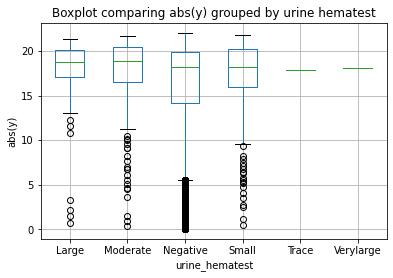

In [ ]:
# Create a boxplot comparing absolute years that survived since the initial examination till death
# Grouped by various urine hematest levels
axes = mortality.boxplot(column='abs_y', by='urine_hematest', return_type='axes')
axes[0].set_ylabel('abs(y)')
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing abs(y) grouped by urine hematest')
plt.show()

In [ ]:
#pairplot (takes 15min to finish)
# Creates a scatterplot for each pair of numerical predictors
# sns.pairplot(mortality[numerical], corner=True)

In [ ]:
# List to store combinations of predictors/response
pred_combos = []
# Get correlation matrix
correlations = mortality.corr()
# Get all the column names in our correlation matrix
column_names = correlations.columns
count = 0
# Go through each colmn
for i in range(len(column_names)):
    col = column_names[i]
    for j in range(i,len(column_names)):
        row = column_names[j]
        # Check if the correlation between the response and predictor
        # or correlation between two predictors is above 0.6
        if abs(correlations[row][col]) > 0.6 and col != row:
            # Store that combination and correlation
            pred_combos.append((row, col, correlations[row][col]))
display(correlations)

,sequence_ID,sex_isFemale,race,poverty_index,age,serum_albumin,alkaline_phosphatase,SGOT,BUN,calcium,creatinine,potassium,sodium,total_bilirubin,serum_protein,red_blood_cells,white_blood_cells,hemoglobin,hematocrit,segmented_neutrophils,lymphocytes,monocytes,eosinophils,basophils,band_neutrophils,cholesterol,serum_iron,serum_magnesium,total_iron_binding_capacity,tranferrin_saturation,urine_pH,sedimentation_rate,uric_acid,systolic_blood_pressure,pulse_pressure,weight,height,y,abs_y
sequence_ID,1.000,-0.023,-1.492e-01,-0.021,-0.075,0.010,0.070,3.783e-02,0.022,0.019,6.171e-02,-0.032,-2.023e-01,0.208,-0.093,0.071,3.055e-02,-6.770e-02,-0.071,-0.005,-6.426e-02,0.273,-4.009e-02,0.110,-7.278e-03,-0.003,-0.022,6.451e-02,0.004,-0.026,-2.088e-01,-0.264,0.034,-7.592e-02,-1.107e-01,0.014,0.059,-9.111e-02,-0.056
sex_isFemale,-0.023,1.000,1.647e-02,-0.064,-0.136,-0.118,-0.080,-1.650e-01,-0.245,-0.076,-3.395e-01,-0.140,-8.127e-02,-0.234,0.002,-0.454,-2.578e-02,-5.654e-01,-0.551,0.001,3.555e-02,-0.060,-9.066e-02,-0.007,-3.576e-03,0.005,-0.108,-8.559e-02,0.180,-0.165,2.909e-02,0.272,-0.465,-8.259e-02,-1.526e-02,-0.346,-0.674,-1.619e-01,0.187
race,-0.149,0.016,1.000e+00,-0.152,-0.008,-0.088,0.034,7.269e-02,-0.075,0.030,-1.688e-02,-0.004,9.604e-05,-0.056,0.219,-0.075,-1.008e-01,-1.759e-01,-0.120,-0.163,1.779e-01,-0.038,8.324e-03,-0.026,-3.496e-02,-0.017,-0.076,-1.360e-01,-0.021,-0.063,3.069e-02,0.181,0.064,9.968e-02,5.192e-02,0.045,-0.050,5.189e-02,-0.056
poverty_index,-0.021,-0.064,-1.517e-01,1.000,-0.038,0.073,-0.058,-2.153e-02,NaN,-0.007,NaN,NaN,NaN,0.022,-0.097,0.043,5.866e-03,8.699e-02,0.068,0.024,-2.819e-02,0.021,9.045e-03,-0.009,-1.485e-02,0.019,0.088,3.759e-02,-0.022,0.086,2.477e-03,-0.130,0.011,-9.401e-02,-7.972e-02,-0.019,0.110,-7.689e-02,0.100
age,-0.075,-0.136,-7.883e-03,-0.038,1.000,-0.208,0.194,3.988e-02,0.339,-0.049,1.413e-01,0.090,5.840e-02,-0.047,-0.039,0.021,-7.152e-02,7.415e-02,0.102,0.014,-7.539e-03,-0.029,1.684e-02,-0.030,-1.710e-02,0.347,-0.017,7.878e-02,-0.252,0.081,-5.962e-02,0.202,0.145,5.059e-01,4.999e-01,0.038,-0.121,5.540e-01,-0.453
serum_albumin,0.010,-0.118,-8.802e-02,0.073,-0.208,1.000,-0.101,2.728e-02,NaN,0.370,NaN,NaN,NaN,0.121,0.445,0.203,1.038e-02,2.508e-01,0.217,-0.016,6.014e-03,0.068,-3.178e-02,0.021,1.511e-02,0.068,0.112,1.684e-01,0.126,0.044,1.587e-02,-0.254,0.119,-6.357e-02,-9.877e-02,0.026,0.126,-1.462e-01,0.171
alkaline_phosphatase,0.070,-0.080,3.396e-02,-0.058,0.194,-0.101,1.000,1.746e-01,0.028,0.006,4.410e-02,0.040,-5.335e-03,0.106,0.102,0.075,7.619e-02,7.219e-02,0.086,0.042,-5.759e-02,0.049,7.420e-03,0.012,3.219e-03,0.103,-0.027,1.227e-02,-0.018,-0.017,-2.009e-02,0.133,0.134,1.770e-01,1.383e-01,0.107,-0.014,1.760e-01,-0.177
SGOT,0.038,-0.165,7.269e-02,-0.022,0.040,0.027,0.175,1.000e+00,0.057,0.065,4.323e-02,0.006,2.512e-02,0.203,0.142,0.075,6.614e-03,1.177e-01,0.123,-0.031,2.292e-02,0.035,-1.149e-02,0.023,-7.797e-04,0.030,0.165,-6.169e-02,0.036,0.135,-1.937e-02,0.004,0.190,9.112e-02,3.933e-02,0.095,0.111,8.978e-02,-0.089
BUN,0.022,-0.245,-7.466e-02,NaN,0.339,NaN,0.028,5.695e-02,1.000,0.074,3.154e-01,0.123,9.648e-02,0.037,NaN,0.114,-2.731e-02,1.326e-01,0.126,-0.027,-1.842e-03,0.064,7.203e-02,-0.004,-3.611e-02,0.170,NaN,9.651e-02,NaN,NaN,-6.045e-02,NaN,0.286,1.710e-01,1.472e-01,0.169,0.104,1.294e-01,-0.122
calcium,0.019,-0.076,2.961e-02,-0.007,-0.049,0.370,0.006,6.522e-02,0.074,1.000,7.793e-02,0.061,1.805e-01,0.091,0.288,0.183,8.797e-02,1.843e-01,0.176,-0.026,2.161e-02,0.023,-1.213e-02,0.006,-2.226e-03,0.169,0.054,7.743e-02,0.161,-0.027,1.911e-02,-0.054,0.129,4.367e-02,-8.637e-03,0.050,0.068,-8.853e-03,-0.003


Correlation of sex_isFemale vs height: -0.6740098473165311
Correlation of red_blood_cells vs hemoglobin: 0.6997393116618722
Correlation of red_blood_cells vs hematocrit: 0.7444551216146681
Correlation of hemoglobin vs hematocrit: 0.9154147576551124
Correlation of segmented_neutrophils vs lymphocytes: -0.9253751215513132
Correlation of serum_iron vs tranferrin_saturation: 0.9055657333870082
Correlation of systolic_blood_pressure vs pulse_pressure: 0.8520625460846576
Correlation of y vs abs_y: -0.6170634939773801


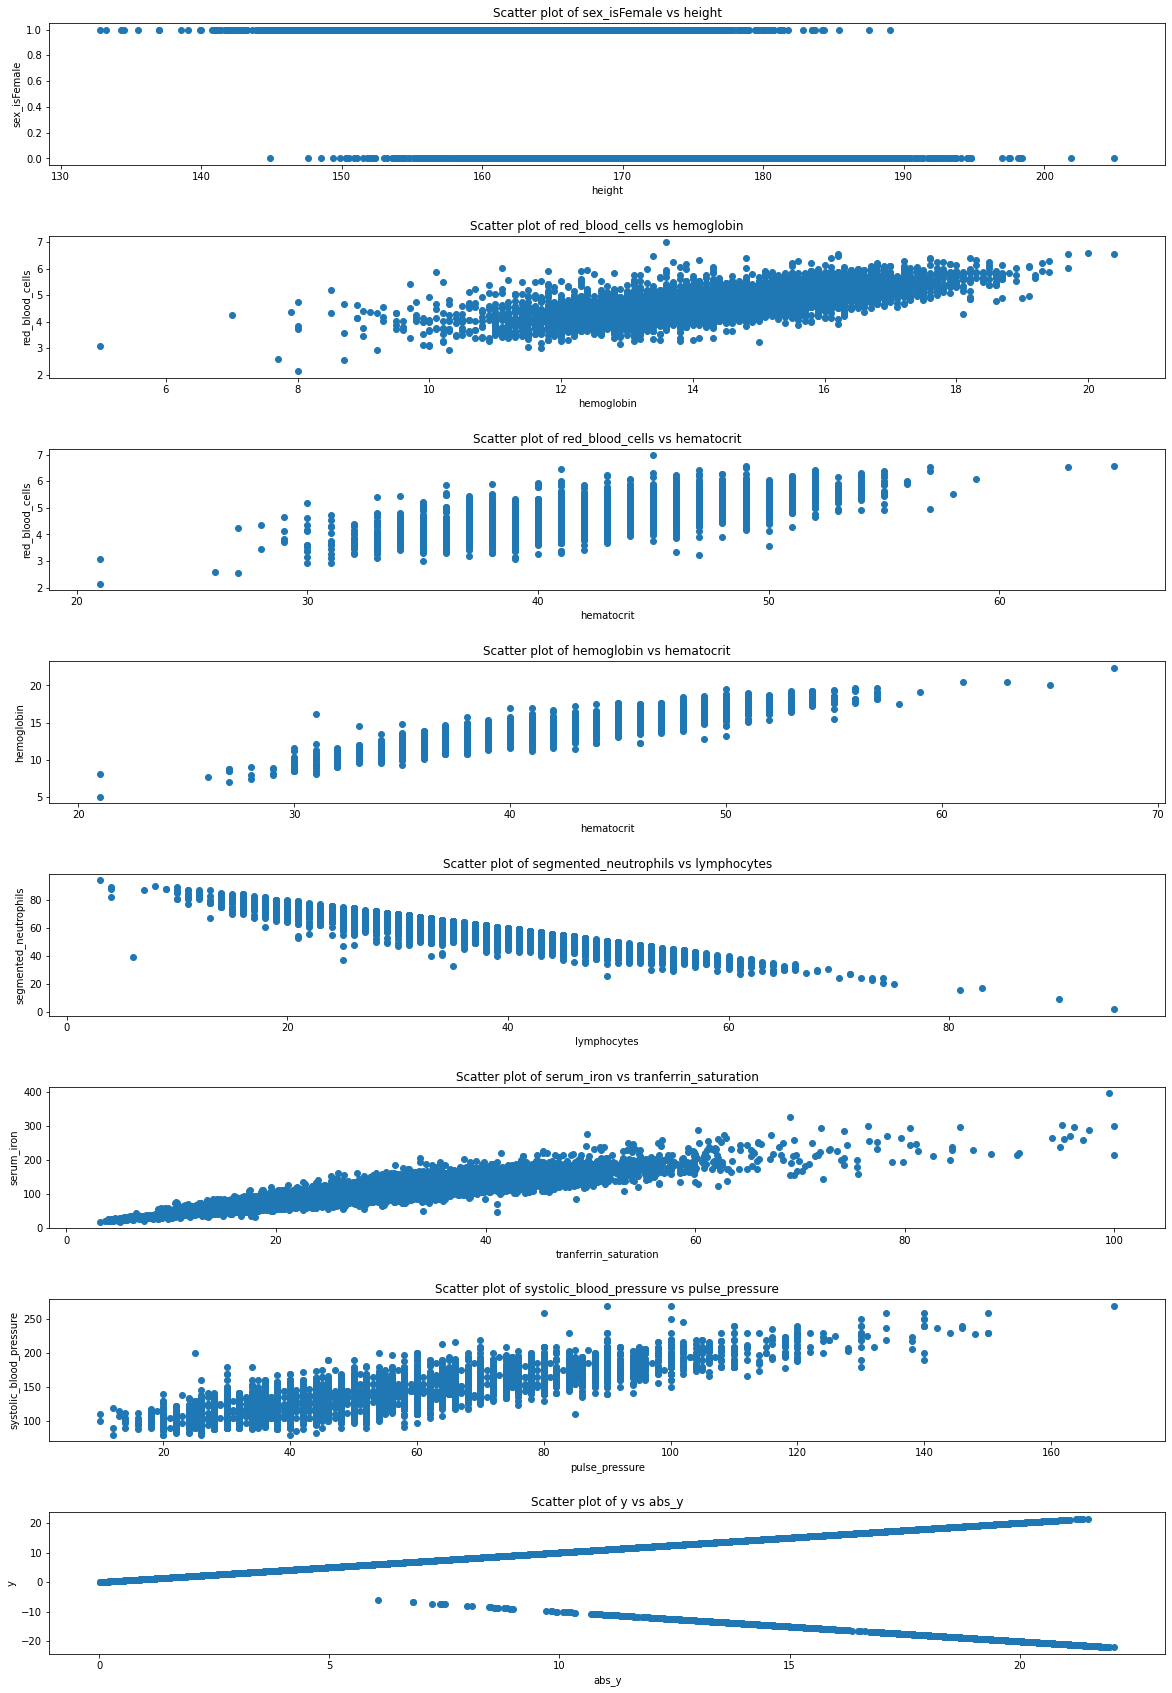

In [ ]:
# Create plots
fig, axes = plt.subplots(len(pred_combos),figsize=(20,30))
fig.subplots_adjust(hspace = 0.5, wspace=0.5)
for i, combo in enumerate(pred_combos):
    # Get the column names 
    var_1 = combo[0]
    var_2 = combo[1]
    # Print out the corresponding correlation
    print(f"Correlation of {var_2} vs {var_1}: {combo[2]}")
    # Output a scatter plot of the combination
    axes[i].scatter(x=mortality[var_1], y=mortality[var_2])
    # Label
    axes[i].set_xlabel(var_1)
    axes[i].set_ylabel(var_2)
    axes[i].set_title(f'Scatter plot of {var_2} vs {var_1}')

plt.show()


In [ ]:
# # Create plots
# fig, axes = plt.subplots(7,5, figsize=(20, 20))
# axes = axes.flatten().tolist()
# fig.subplots_adjust(hspace = 0.5, wspace=0.5)

# # Go through all the numerical predictors along with y
# for i, pred in enumerate((mortality[numerical+['y']]).columns):
#     # Plot histograms for that predictor for males
#     axes[i].hist(mortality[mortality['sex_isFemale'] == 0][pred], density=True, bins=25, alpha=0.8, label='Male')
#     # Plot histograms for that predictor for females
#     axes[i].hist(mortality[mortality['sex_isFemale'] == 1][pred], density=True, bins=25, alpha=0.8, label='Female')
#     # Label
#     axes[i].set_xlabel(pred)
#     axes[i].set_ylabel('Proportion')
#     axes[i].set_title(f'{pred} vs Sex')
#     axes[i].legend()

# plt.show()

In [ ]:
# fig, axes = plt.subplots(7,5, figsize=(20, 20))
# axes = axes.flatten().tolist()
# fig.subplots_adjust(hspace = 0.6, wspace=0.6)

# for i, pred in enumerate((mortality[numerical+['y']]).columns):
#     axes[i].hist(mortality[pred], density=True, bins=25)
#     axes[i].set_xlabel(pred)
#     axes[i].set_ylabel('Proportion')
#     axes[i].set_title(f'Distribution of {pred}')

# plt.show()

In [ ]:
# fig, axes = plt.subplots(7,5, figsize=(20, 20))
# axes = axes.flatten().tolist()
# fig.subplots_adjust(hspace = 0.5, wspace=0.6)

# for i, pred in enumerate((mortality[numerical+['y']]).columns):
#     axes[i].hist(mortality[mortality['race'] == 1][pred], density=True, bins=25, alpha=0.8, label='White')
#     axes[i].hist(mortality[mortality['race'] == 2][pred], density=True, bins=25, alpha=0.8, label='Black')
#     axes[i].hist(mortality[mortality['race'] == 3][pred], density=True, bins=25, alpha=0.4, label='Other')
#     axes[i].set_xlabel(pred)
#     axes[i].set_ylabel('Proportion')
#     axes[i].set_title(f'{pred} vs. Race')
#     axes[i].legend()

# plt.show()

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle

In [ ]:
# Identify predictor and response variables
numerical = ['poverty_index', 'age', 'serum_albumin', 'alkaline_phosphatase', 'SGOT', 'BUN', 'calcium', 'creatinine', 'potassium', 'sodium', 'total_bilirubin', 'serum_protein', 'red_blood_cells', 'white_blood_cells', 'hemoglobin', 'hematocrit', 'segmented_neutrophils', 'lymphocytes', 'monocytes', 'eosinophils', 'basophils', 'band_neutrophils', 'cholesterol', 'serum_iron', 'serum_magnesium', 'total_iron_binding_capacity', 'tranferrin_saturation', 'urine_pH', 'sedimentation_rate', 'uric_acid', 'systolic_blood_pressure', 'pulse_pressure', 'weight', 'height']
X = mortality[numerical]
y = mortality['y']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=random_seed)

# Impute missing data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Baseline multiple linear regression model (we will use more complex methods later on)
regression_baseline = LinearRegression()
regression_baseline.fit(X_train_imputed, y_train)

y_pred_train = regression_baseline.predict(X_train_imputed)
y_pred_test = regression_baseline.predict(X_test_imputed)

train_score = mean_squared_error(y_train, y_pred_train)
test_score = mean_squared_error(y_test, y_pred_test)

print(f"MSE score on the training set is {train_score:.4f}")
print(f"MSE score on the test set is {test_score:.4f}")

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"R-squared score on the training set is {r2_train:.4f}")
print(f"R-squared score on the test set is {r2_test:.4f}")

MSE score on the training set is 138.3733
MSE score on the test set is 135.4521
R-squared score on the training set is 0.3338
R-squared score on the test set is 0.3416


In [ ]:
# Now predicting off of the absolute value of the response variable
y_train_abs = abs(y_train)
y_test_abs = abs(y_test)

regression_abs = LinearRegression()
regression_abs.fit(X_train_imputed, y_train_abs)

y_pred_train = regression_abs.predict(X_train_imputed)
y_pred_test = regression_abs.predict(X_test_imputed)

train_score = mean_squared_error(y_train_abs, y_pred_train)
test_score = mean_squared_error(y_test_abs, y_pred_test)

print(f"MSE score on the training set is {train_score:.4f}")
print(f"MSE score on the test set is {test_score:.4f}")

r2_train = r2_score(y_train_abs, y_pred_train)
r2_test = r2_score(y_test_abs, y_pred_test)

print(f"R-squared score on the training set is {r2_train:.4f}")
print(f"R-squared score on the test set is {r2_test:.4f}")

MSE score on the training set is 20.5182
MSE score on the test set is 20.9607
R-squared score on the training set is 0.2578
R-squared score on the test set is 0.2423


In [ ]:
# multiple polynomial linear regression model
# finds the best polynomial using cross validation and compares using y vs abs(y)


X_train_imputed_2, x_val, y_train_2, y_val = train_test_split(X_train_imputed,y_train,train_size=0.80,random_state=random_seed)

# To iterate over the range, select the maximum degree of the polynomial
maxdeg = 4

# Create two empty lists to store training and validation MSEs
training_error, validation_error = [],[]

# Loop through the degrees of the polynomial to create different models
for d in range(1,maxdeg):
    
    # Compute the polynomial features for the current degree 
    # for the train set
    x_poly_train = PolynomialFeatures(degree = d).fit_transform(X_train_imputed_2)

    # Compute the polynomial features for the validation set
    x_poly_val = PolynomialFeatures(degree = d).fit_transform(x_val)
    
    # Initialize a linear regression model
    lreg = LinearRegression(fit_intercept=False)

    # Fit the model on the train data
    lreg.fit(x_poly_train, y_train_2)
    
    # Use the trained model to predict on the transformed train data
    y_train_pred = lreg.predict(x_poly_train)

    # Use the trained model to predict on the transformed validation data
    y_val_pred = lreg.predict(x_poly_val)
    
    # Compute the MSE on the train predictions
    training_error.append(mean_squared_error(y_train_2, y_train_pred))

    # Compute the MSE on the validation predictions
    validation_error.append(mean_squared_error(y_val, y_val_pred))


In [ ]:
print(f"We're using y as a the target predictor here rather than abs(y).")
print(f"List of training errors for degree 1 to degree {maxdeg-1}: {training_error}")
print(f"List of validation errors for degree 1 to degree {maxdeg-1}: {validation_error}")  
# Compute the best degree, which is the model with the 
# lowest validation error
min_mse = min(validation_error)
best_degree = validation_error.index(min_mse) + 1

# Print the degree of the best model computed above
print("The degree for which the validation error is lowest is",best_degree)

We're using y as a the target predictor here rather than abs(y).
List of training errors for degree 1 to degree 3: [138.22818633959517, 122.70969468267585, 47.58914055659386]
List of validation errors for degree 1 to degree 3: [139.42382406376493, 276.6753242847257, 4413793.552356396]
The degree for which the validation error is lowest is 1


We're using y as a the target predictor here rather than abs(y).
List of training errors for degree 1 to degree 3: [138.22818633959517, 122.70969468267585, 47.58914055659386]
List of validation errors for degree 1 to degree 3: [139.42382406376493, 276.6753242847257, 4413793.552356396]
The degree for which the validation error is lowest is 1

In [ ]:
# multiple polynomial linear regression model
# finds the best polynomial using cross validation and compares using y vs abs(y)


X_train_imputed_2, x_val, y_train_2, y_val = train_test_split(X_train_imputed,y_train_abs,train_size=0.80,random_state=random_seed)

# To iterate over the range, select the maximum degree of the polynomial
maxdeg = 4

# Create two empty lists to store training and validation MSEs
training_error, validation_error = [],[]

# Loop through the degrees of the polynomial to create different models
for d in range(1,maxdeg):
    
    # Compute the polynomial features for the current degree 
    # for the train set
    x_poly_train = PolynomialFeatures(degree = d).fit_transform(X_train_imputed_2)

    # Compute the polynomial features for the validation set
    x_poly_val = PolynomialFeatures(degree = d).fit_transform(x_val)
    
    # Initialize a linear regression model
    lreg = LinearRegression(fit_intercept=False)

    # Fit the model on the train data
    lreg.fit(x_poly_train, y_train_2)
    
    # Use the trained model to predict on the transformed train data
    y_train_pred = lreg.predict(x_poly_train)

    # Use the trained model to predict on the transformed validation data
    y_val_pred = lreg.predict(x_poly_val)
    
    # Compute the MSE on the train predictions
    training_error.append(mean_squared_error(y_train_2, y_train_pred))

    # Compute the MSE on the validation predictions
    validation_error.append(mean_squared_error(y_val, y_val_pred))


In [ ]:
print(f"We're using abs(y) as a the target predictor here rather than y.")
print(f"List of training errors for degree 1 to degree {maxdeg-1}: {training_error}")
print(f"List of validation errors for degree 1 to degree {maxdeg-1}: {validation_error}")  
# Compute the best degree, which is the model with the 
# lowest validation error
min_mse = min(validation_error)
best_degree = validation_error.index(min_mse) + 1

# Print the degree of the best model computed above
print("The degree for which the validation error is lowest is",best_degree)

We're using abs(y) as a the target predictor here rather than y.
List of training errors for degree 1 to degree 3: [20.560916298652337, 17.21474426479187, 6.70976895331115]
List of validation errors for degree 1 to degree 3: [20.46279040019355, 56.68406410303391, 735582.5586416387]
The degree for which the validation error is lowest is 1


We're using abs(y) as a the target predictor here rather than y.

List of training errors for degree 1 to degree 3: [20.560916298652337, 17.21474426479187, 6.70976895331115]

List of validation errors for degree 1 to degree 3: [20.46279040019355, 56.68406410303391, 735582.5586416387]

The degree for which the validation error is lowest is 1


We see that using abs(y) for the target predictor gives us better MSE than using y, and in both cases using degree 1 is the best.

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [ ]:
# Normalize the training and test data
X_train_norm = normalize(X_train_imputed)
X_test_norm = normalize(X_test_imputed)

In [ ]:
"""deepnn = Sequential()
# We are adding four layers of neurons 
# The activation function is ReLU, Rectified Linear Units
# This takes all the values and normalizes them on a scale from 0 to 1
# The ReLU algorithm basically assigns a value to either 0 or 1, depending which it is closer to
# There will be 128 neurons in this layer 
# Since this is the input layer, we want the input shape to be the number of columns we have
deepnn.add(Dense(128, activation="relu", input_shape=(X_train_norm[0].shape)))
# There will be 64 neurons in this layer 
deepnn.add(Dense(64, activation="relu"))
# There will be 32 neurons in this layer 
deepnn.add(Dense(32, activation="relu"))
# There will be 1 neuron in this layer since we want to output a single value as the prediction
deepnn.add(Dense(1))
# Now we want to compile our model
# The optimizer will be adam and the loss function will be mean squared error
deepnn.compile(optimizer="adam", loss="mse", metrics=["mse", "mae"])"""

In [ ]:
#num_epochs = 100
# Now we want to fit our model on the training data over 100 epochs
# Verbose will just output the metrics after each round of training
#logs = deepnn.fit(X_train_norm, y_train, epochs=num_epochs, batch_size=1, verbose=True, validation_data=(X_test_norm, y_test))

Epoch 1/100
11525/11525 [==============================] - 32s 3ms/step - loss: 194.6426 - mse: 194.6426 - mae: 11.9971 - val_loss: 143.4732 - val_mse: 143.4732 - val_mae: 9.4368
Epoch 2/100
11525/11525 [==============================] - 31s 3ms/step - loss: 151.3000 - mse: 151.3000 - mae: 9.4038 - val_loss: 147.6330 - val_mse: 147.6330 - val_mae: 9.0820
Epoch 3/100
11525/11525 [==============================] - 32s 3ms/step - loss: 151.0217 - mse: 151.0217 - mae: 9.3611 - val_loss: 164.2994 - val_mse: 164.2994 - val_mae: 9.4811
Epoch 4/100
11525/11525 [==============================] - 31s 3ms/step - loss: 151.2462 - mse: 151.2462 - mae: 9.2498 - val_loss: 137.2325 - val_mse: 137.2325 - val_mae: 8.5262
Epoch 5/100
11525/11525 [==============================] - 39s 3ms/step - loss: 145.5886 - mse: 145.5886 - mae: 8.9953 - val_loss: 151.5779 - val_mse: 151.5779 - val_mae: 8.7599
Epoch 6/100
11525/11525 [==============================] - 43s 4ms/step - loss: 145.9779 - mse: 145.9779 - ma

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=24ab17b8-b2f8-4eb1-897f-b86e4cf16ad8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>